<a href="https://colab.research.google.com/github/abhinavpathania/Data-Science/blob/master/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wquantiles

In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
data=pd.read_csv("/content/state.csv")
data.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


**Estimates of Location**

In [ ]:
data['Population'].mean()

6162876.3

In [ ]:
data['Murder.Rate'].mean()

4.066

In [ ]:
trim_mean(data['Population'],0.1)

4783697.125

In [ ]:
np.average(data['Murder.Rate'],weights=data['Population'])

4.445833981123393

Weighted Median:

In [ ]:
wquantiles.median(data['Murder.Rate'], weights=data['Population'])

4.4

**Estimation of variability**

In [ ]:
data['Population'].std()

6848235.347401142

**Mean Absolute deviation**

In [ ]:
np.mean(np.abs(data['Population']- data['Population'].mean()))

4450933.356000001

**Median Absolute deviation**

1. The raw MAD underestimates the standard deviation when data follows a normal distribution.

2. Multiplying by 1.4826 corrects this bias, making it a robust alternative to the standard deviation.

In [ ]:
np.median(np.abs(data['Population']- data['Population'].median()))

2596702.0

In [ ]:
robust.scale.mad(data['Population'])

3849876.1459979336

**Inter-Quartile Range**

In [ ]:
data['Population'].quantile(0.75) - data['Population'].quantile(0.25)

4847308.0

**Percentiles and Boxplots**

In [ ]:
data['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

,Murder.Rate
0.05,1.600
0.25,2.425
0.50,4.000
0.75,5.550
0.95,6.510


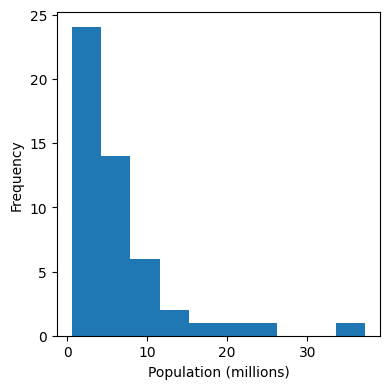

In [ ]:
ax = (data['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

In [ ]:
dfw = pd.read_csv('/content/dfw_airline.csv')

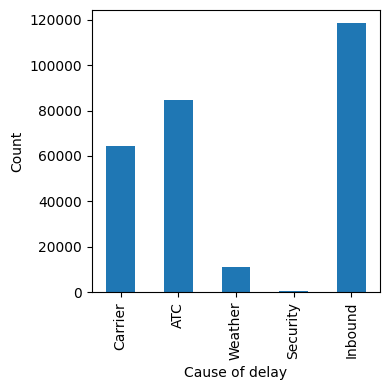

In [ ]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()